# IMT 573 - Problem Set 8 - Prediction

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales Collaborators: None

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

import warnings
warnings.filterwarnings('ignore')

In this problem set, we will aim to build a model to explain the factors associated with a person having a heart attack.  Thereafter we also look at the predicted values and compute accuracy. We will use a dataset `heart.csv` avaialable from https://archive.ics.uci.edu/dataset/45/heart+disease, which contains health information of each person (these are the predictors) and whether or not the person had a heart attack before (the binary outcome variable). You can download the data `heart.csv` from Canvas. 

The variables are (as described on the webpage):

- age: age of the patient
- sex: sex of the patient (1 = male; 0 = female)
- cp: chest pain type chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results (0 normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.)
- thalachh: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope:the slope of the peak exercise ST segment ( 0= upsloping; 1= flat; 2 = downsloping )
- ca: number of major vessels (range : 0-3)
- thal (Thalassemias):  0 = error (in the original dataset 0 maps to NaN's); 1 = fixed defect ; 2 = normal; 3 = reversable defect

- target: 0 = no disease, 1 = disease


### Problem 1: Logistic Regression

Points: 10

As described above, our primary aim in this assignment is to build a model to predct heart attack status -- whether a person had a heart attack or not based on other health information. 

#### (a) Load the data

Load data.  The data should contain 303 rows, and 11 columns. Do some basic checks.  Andwer these questions:
- Do we have any missing values? Are you concerns about missing data?
- What are the data types? Do these make sense for the variables?
- What are ranges of numeric variables, and possible values of categorical variables?  
- What is the rate of heart attacks among these patients?
  
Compare the values with the documentation and comment what do you see.

In [2]:
df = pd.read_csv('heart.csv')
columns = df.columns.tolist()
print(columns)
display(df)
print(df.shape)
print(df.dtypes)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [3]:
# Find any NaN values
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
print('min', df['age'].min(), 'max', df['age'].max())
print('error values in thal:', (df['thal'] == 0).sum())

min 29 max 77
error values in thal: 2


I see 14 columns, not 11.<p>
I see two NaN in thal, but they have been converted to 0. I don't see any other bad data (ie NaN).<p>
The data types have all been converted to numbers, which should make analyzing the data easier.<p>

In [5]:
# Min Max of all columns:
for column in columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")

Column: age, Min: 29, Max: 77
Column: sex, Min: 0, Max: 1
Column: cp, Min: 0, Max: 3
Column: trestbps, Min: 94, Max: 200
Column: chol, Min: 126, Max: 564
Column: fbs, Min: 0, Max: 1
Column: restecg, Min: 0, Max: 2
Column: thalach, Min: 71, Max: 202
Column: exang, Min: 0, Max: 1
Column: oldpeak, Min: 0.0, Max: 6.2
Column: slope, Min: 0, Max: 2
Column: ca, Min: 0, Max: 4
Column: thal, Min: 0, Max: 3
Column: target, Min: 0, Max: 1


In [6]:
# Looks to be only one duplicated row that could be real data, ie two people with identical data
df.loc[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


The following data could be considered categorical, but was converted to numerical:
- `sex`: sex of the patient (1 = male; 0 = female)
- `cp`: chest pain type chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3: asymptomatic
- `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0 normal; 1 = having ST-T wave abnormality 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.)
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `slope`:the slope of the peak exercise ST segment ( 0= upsloping; 1= flat; 2 = downsloping )
- `thal` (Thalassemias):  0 = error 1 = fixed defect ; 2 = normal; 3 = reversable defect
- `target`: 0 = no disease, 1 = disease

I read through all the instructions and the website, and nothing specified what the heart attack is in hearts.csv. On the website it calls out `goal` but that field is 0-4 not 0-1. I will assume it is `target` in the hearts.csv file.

In [7]:
percentage_target_1 = (df['target'] == 1).mean() * 100
print(f"Rate of patients who had a heart attack (ie target=1): {percentage_target_1:.2f}%")

Rate of patients who had a heart attack (ie target=1): 54.46%


#### (b) Logistic regression model

Fit a logistic regression model with all the explanatory variables.  Do not forget to convert the categorical ones to categories!

In each case also comment on statistical significance of the results. (Hint : https://www.statsmodels.org/stable/discretemod.html )

In [8]:
# Replace the numerical to categories where appropriate
# Mapping dictionaries
sex_map = {1: 'male', 0: 'female'}
cp_map = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}
fbs_map = {1: 'true', 0: 'false'}
restecg_map = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'}
exang_map = {1: 'yes', 0: 'no'}
slope_map = {0: 'upsloping', 1: 'flat', 2: 'downsloping'}
thal_map = {0: 'error', 1: 'fixed defect', 2: 'normal', 3: 'reversible defect'}
target_map = {0: 'no disease', 1: 'disease'}

df_cat = df.copy()
# Applying the mappings
df_cat['sex'] = df_cat['sex'].replace(sex_map)
df_cat['cp'] = df_cat['cp'].replace(cp_map)
df_cat['fbs'] = df_cat['fbs'].replace(fbs_map)
df_cat['restecg'] = df_cat['restecg'].replace(restecg_map)
df_cat['exang'] = df_cat['exang'].replace(exang_map)
df_cat['slope'] = df_cat['slope'].replace(slope_map)
df_cat['thal'] = df_cat['thal'].replace(thal_map)
df_cat['target'] = df_cat['target'].replace(target_map)

print(df_cat)

     age     sex                cp  trestbps  chol    fbs  \
0     63    male      asymptomatic       145   233   true   
1     37    male  non-anginal pain       130   250  false   
2     41  female   atypical angina       130   204  false   
3     56    male   atypical angina       120   236  false   
4     57  female    typical angina       120   354  false   
..   ...     ...               ...       ...   ...    ...   
298   57  female    typical angina       140   241  false   
299   45    male      asymptomatic       110   264  false   
300   68    male    typical angina       144   193   true   
301   57    male    typical angina       130   131  false   
302   57  female   atypical angina       130   236  false   

                   restecg  thalach exang  oldpeak        slope  ca  \
0                   normal      150    no      2.3    upsloping   0   
1    ST-T wave abnormality      187    no      3.5    upsloping   0   
2                   normal      172    no      1.4  do

In [9]:
# Fit the regression model on all the numeric values
# This CANNOT be done on the categorical values which is what the instructions imply
X = df.drop('target', axis=1)  # Explanatory variables
y = df['target']  # Dependent variable
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.4937
Time:                        20:37:52   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.

For the above results, the following variables are significant or not:<p>
 - `const`: Not significant (p-value = 0.180)
 - `age`: Not significant (p-value = 0.832)
 - `sex`: Significant (p-value < 0.001)
 - `cp`: Significant (p-value < 0.001)
 - `trestbps`: Marginally significant (p-value = 0.060)
 - `chol`: Not significant (p-value = 0.221)
 - `fbs`: Not significant (p-value = 0.947)
 - `restecg`: Not significant (p-value = 0.181)
 - `thalach`: Significant (p-value = 0.026)
 - `exang`: Significant (p-value = 0.017)
 - `oldpeak`: Significant (p-value = 0.012)
 - `slope`: Marginally significant (p-value = 0.098)
 - `ca`: Significant (p-value < 0.001)
 - `thal`: Significant (p-value = 0.002)

#### (c) Data Cleaning

You probably noticed that all the above variables are coded as numbers. However, not all of these are in fact of numeric (interval, ratio) measure type. Which variables above are inherently non-numeric (nominal or ordinal)? Fix any issues.

In [10]:
# The following variables are inherently non-numeric:
sex_map = {1: 'male', 0: 'female'}
cp_map = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}
fbs_map = {1: 'true', 0: 'false'}
restecg_map = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'}
exang_map = {1: 'yes', 0: 'no'}
slope_map = {0: 'upsloping', 1: 'flat', 2: 'downsloping'}
thal_map = {0: 'error', 1: 'fixed defect', 2: 'normal', 3: 'reversible defect'}
target_map = {0: 'no disease', 1: 'disease'}
df_cat = df.copy()
# Applying the mappings
df_cat['sex'] = df_cat['sex'].replace(sex_map)
df_cat['cp'] = df_cat['cp'].replace(cp_map)
df_cat['fbs'] = df_cat['fbs'].replace(fbs_map)
df_cat['restecg'] = df_cat['restecg'].replace(restecg_map)
df_cat['exang'] = df_cat['exang'].replace(exang_map)
df_cat['slope'] = df_cat['slope'].replace(slope_map)
df_cat['thal'] = df_cat['thal'].replace(thal_map)
df_cat['target'] = df_cat['target'].replace(target_map)

display(df_cat)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,true,normal,150,no,2.3,upsloping,0,fixed defect,disease
1,37,male,non-anginal pain,130,250,false,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,disease
2,41,female,atypical angina,130,204,false,normal,172,no,1.4,downsloping,0,normal,disease
3,56,male,atypical angina,120,236,false,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,disease
4,57,female,typical angina,120,354,false,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,false,ST-T wave abnormality,123,yes,0.2,flat,0,reversible defect,no disease
299,45,male,asymptomatic,110,264,false,ST-T wave abnormality,132,no,1.2,flat,0,reversible defect,no disease
300,68,male,typical angina,144,193,true,ST-T wave abnormality,141,no,3.4,flat,2,reversible defect,no disease
301,57,male,typical angina,130,131,false,ST-T wave abnormality,115,yes,1.2,flat,1,reversible defect,no disease


Run EDA(Exploratory Data Analysis) to answer at least 2 questions listd below:
- How is age related to probability of heart attack?
- Are men or women more likely to have heart attack?   
- Is higher blood pressure (`trtbps`) associated with more heart attacks?
- How much more likely is heart attack for someone who has chest pain (`cp type 1`) compared to someone who has chest pain type 3?
- What is the heart attack distribution based on different (`restecg`) categories? 

In [11]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.4937
Time:                        20:37:52   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.0

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Look at heart attack by gender   
aggregate_df = df_cat.groupby(['sex', 'target']).size().unstack(fill_value=0)
print(aggregate_df)

target  disease  no disease
sex                        
female       72          24
male         93         114


Are men or women more likely to have heart attack?<p>
The coefficient for `sex` is -1.7582 with a p-value of 0.000, which is statistically significant. Since 1 represents men and 0 represents women, the negative coefficient suggests that men are less likely to have a heart attack compared to women, holding other variables constant.
    

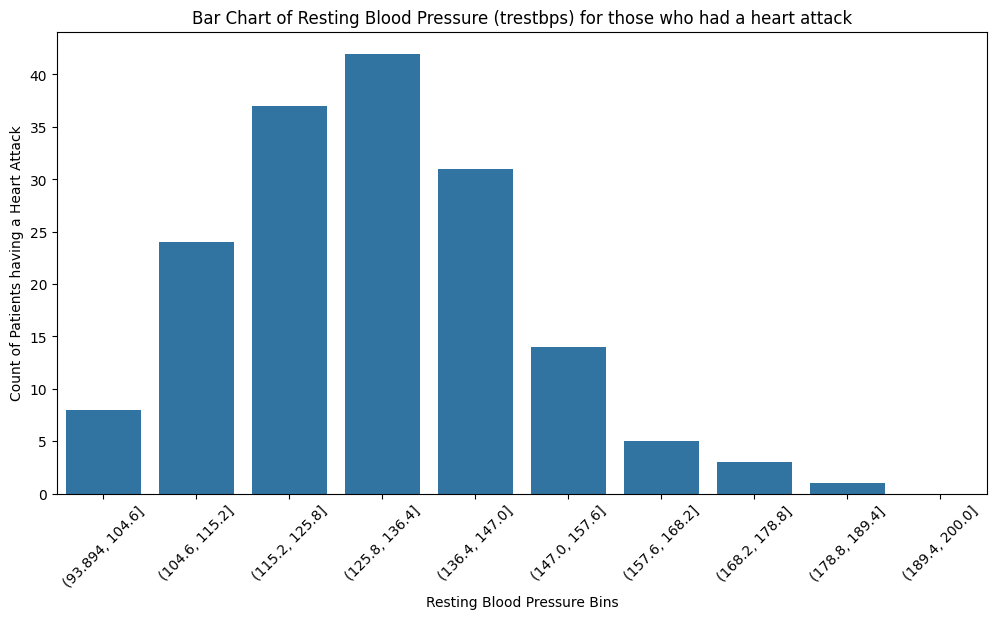

In [14]:
#- Is higher blood pressure (`trtbps`) associated with more heart attacks?
df['trestbps_bins'] = pd.cut(df['trestbps'], bins=10)

# Filter the DataFrame to include only rows where target is 1
df_target_1 = df[df['target'] == 1]

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='trestbps_bins', data=df_target_1)
plt.xlabel('Resting Blood Pressure Bins')
plt.ylabel('Count of Patients having a Heart Attack')
plt.title('Bar Chart of Resting Blood Pressure (trestbps) for those who had a heart attack')
plt.xticks(rotation=45)
plt.show()

Once again the coefficient for `trestbps` is -0.0195 with a p-value of 0.060, which is moderately statistically significant. The negative coefficient suggests that people with high blood pressure are less likely to have a heart attack compared to people with lower blood pressure, holding other variables constant.

### Problem 2: Prediction

The last task is to split the dataset into a training (80% of the dataset) set and a testing (20% of the dataset) set. 

Run a logistic regression and another classification model (based on your own preference).  (Hint: Try scikit learn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html )

Compute the confusion matrix based on the 2 models. Discuss what you find.

In [15]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[['sex']]
y = df['target']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.5573770491803278
Confusion Matrix:
[[25  4]
 [23  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.86      0.65        29
           1       0.69      0.28      0.40        32

    accuracy                           0.56        61
   macro avg       0.61      0.57      0.52        61
weighted avg       0.61      0.56      0.52        61



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Going to see what other models perform well
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
high_model, high_acc  = '', -9999
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > high_acc:
        high_model, high_acc = model, accuracy
    print(f'{name} Accuracy: {accuracy}')
print("Highest", high_model, high_acc)

Logistic Regression Accuracy: 0.5573770491803278
K-Nearest Neighbors Accuracy: 0.5573770491803278
Support Vector Machine Accuracy: 0.5573770491803278
Decision Tree Accuracy: 0.5573770491803278
Random Forest Accuracy: 0.5573770491803278
Gradient Boosting Accuracy: 0.5573770491803278
Naive Bayes Accuracy: 0.5573770491803278
Highest LogisticRegression(max_iter=1000) 0.5573770491803278


In [17]:
X = df[['trestbps']]
y = df['target']

high_model, high_acc  = '', -9999
for name, model in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > high_acc:
        high_model, high_acc = model, accuracy
    print(f'{name} Accuracy: {accuracy}')
print("Highest", high_model, high_acc)

Logistic Regression Accuracy: 0.5901639344262295
K-Nearest Neighbors Accuracy: 0.45901639344262296
Support Vector Machine Accuracy: 0.5573770491803278
Decision Tree Accuracy: 0.4918032786885246
Random Forest Accuracy: 0.5081967213114754
Gradient Boosting Accuracy: 0.5081967213114754
Naive Bayes Accuracy: 0.5901639344262295
Highest LogisticRegression(max_iter=1000) 0.5901639344262295


All the models seem to perform equally well, but with low accuracy. 45-59% is not very accurate. 

### Problem 3: Reflection

What concerns do you have about this data and the analysis above? How might data on heart attack status and a model like the one you fit above be used in the real world?

This data does not seem complete or it is possibly only a very small group of people in a single area and not randomized across demographic or geographic boundaries. I would not trust the accuracy of the models I prepared above because they accuracy was too low.<p>
Assuming we had a broad, randomized set of data, we could easily use one of these models to predict risk factors for a heart attack and then propose possible interventions like diet, exercise, etc.